In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

# Define your RLS algorithm function for echo cancellation
def rls_echo_cancellation(x, d, M, delta):
    N = len(x)
    W = np.zeros(M)
    P = delta * np.eye(M)
    y = np.zeros(N)
    e = np.zeros(N)

    for n in range(M, N):
        x_vec = x[n - M: n][::-1]
        y[n] = np.dot(W, x_vec)
        e[n] = d[n] - y[n]

        k = np.dot(P, x_vec) / (delta + np.dot(x_vec, np.dot(P, x_vec)))
        W += k * e[n]
        P = (P - np.outer(k, np.dot(x_vec, P))) / delta
    
    return W, y, e

# Set the parameters
M = 128  # Number of taps for adaptive filter
delta = 0.01  # Regularization factor for RLS

# Load the CSS data and echo signal
data_path = sio.loadmat('path.mat')
impulse_response = data_path['path'].flatten()
mat_data = sio.loadmat('css.mat')
css_data = mat_data['css'].reshape(-1)

# Apply the RLS algorithm for echo cancellation
W_rls, y_rls, e_rls = rls_echo_cancellation(css_data, impulse_response, M, delta)

# Plot the estimated echo signal
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(impulse_response, label='Actual Echo Signal')
plt.plot(y_rls, label='Estimated Echo Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Echo Signal')
plt.legend()

# Plot the error signal
plt.subplot(2, 1, 2)
plt.plot(e_rls)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Error Signal')

plt.tight_layout()
plt.show()

IndexError: index 128 is out of bounds for axis 0 with size 96

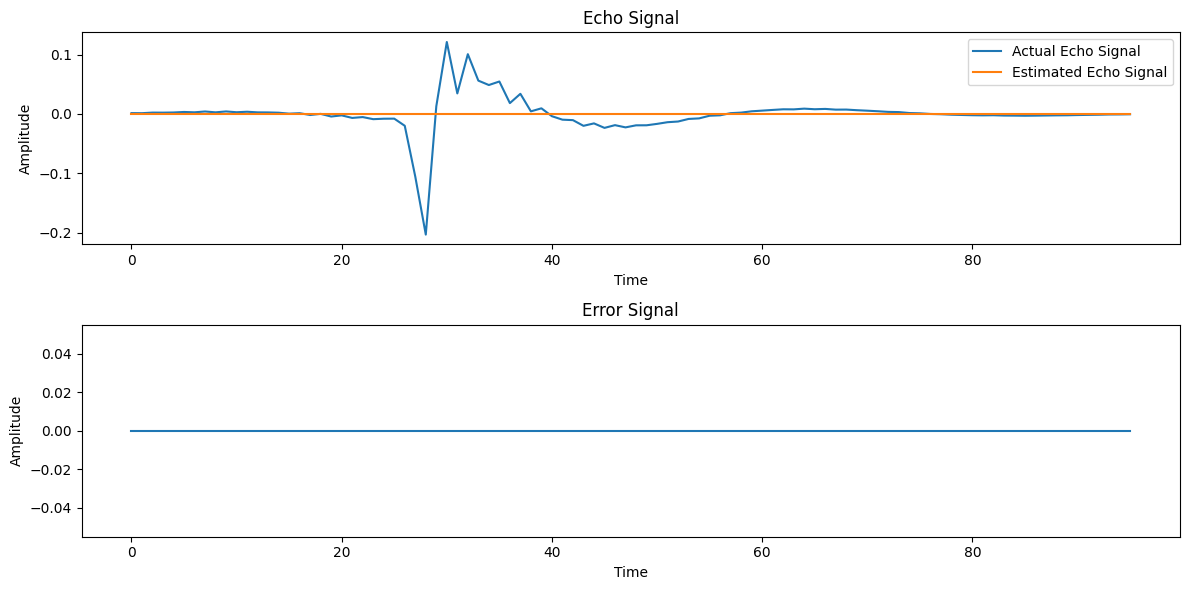

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

# Define your RLS algorithm function for echo cancellation
def rls_echo_cancellation(x, d, M, delta):
    N = len(x)
    W = np.zeros(M)
    P = delta * np.eye(M)
    y = np.zeros(N)
    e = np.zeros(N)

    for n in range(M, N):
        x_vec = x[n - M: n][::-1]
        y[n] = np.dot(W, x_vec)
        e[n] = d[n] - y[n]

        k = np.dot(P, x_vec) / (delta + np.dot(x_vec, np.dot(P, x_vec)))
        W += k * e[n]
        P = (P - np.outer(k, np.dot(x_vec, P))) / delta
    
    return W, y, e

# Set the parameters
M = 96  # Number of taps for adaptive filter
delta = 0.01  # Regularization factor for RLS

# Load the CSS data and echo signal
data_path = sio.loadmat('path.mat')
impulse_response = data_path['path'].flatten()
mat_data = sio.loadmat('css.mat')
css_data = mat_data['css'].reshape(-1)

# Truncate the CSS data if necessary
if len(css_data) > M:
    css_data = css_data[:M]

# Apply the RLS algorithm for echo cancellation
W_rls, y_rls, e_rls = rls_echo_cancellation(css_data, impulse_response, M, delta)

# Plot the estimated echo signal
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(impulse_response, label='Actual Echo Signal')
plt.plot(y_rls, label='Estimated Echo Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Echo Signal')
plt.legend()

# Plot the error signal
plt.subplot(2, 1, 2)
plt.plot(e_rls)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Error Signal')

plt.tight_layout()
plt.show()